<a href="https://colab.research.google.com/github/patrickjwolf/CS-Data-Science-Build-Week-1/blob/master/CS_Buildweek_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

In [ ]:
from google.colab import files
import pandas as pd
import seaborn as sns
import numpy as np


df = pd.read_csv('https://raw.githubusercontent.com/patrickjwolf/CS-Data-Science-Build-Week-1/master/CS_Build_Week_1.csv')

In [ ]:
df.head()

,Trip #,Date,Day,Pickup Time,Duration(Minutes),Distance(Miles),Total,$/Minute,$/Mile
0,1,5/7/2019,Tuesday,1612,8,3.21,3.42,0.427500,1.065421
1,2,5/7/2019,Tuesday,1723,15,6.09,6.29,0.419333,1.032841
2,3,5/7/2019,Tuesday,1759,33,14.52,13.95,0.422727,0.960744
3,4,5/7/2019,Tuesday,1849,8,2.24,3.00,0.375000,1.339286
4,5,5/7/2019,Tuesday,1906,18,11.29,14.98,0.832222,1.326838


In [ ]:
cat_cols = df.columns[df.dtypes=='object']
num_cols = df.columns[df.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

2 categorical columns
7 numerical columns


In [ ]:
# Cast categorical columns to "category" data type
df[cat_cols] = df[cat_cols].astype('category')

df.dtypes

Trip #                  int64
Date                 category
Day                  category
Pickup Time             int64
Duration(Minutes)       int64
Distance(Miles)       float64
Total                 float64
$/Minute              float64
$/Mile                float64
dtype: object

In [ ]:
for col in cat_cols:
  df[col] = df[col].cat.codes

print(df.shape)
df.head()

(1044, 9)


,Trip #,Date,Day,Pickup Time,Duration(Minutes),Distance(Miles),Total,$/Minute,$/Mile
0,1,22,5,1612,8,3.21,3.42,0.427500,1.065421
1,2,22,5,1723,15,6.09,6.29,0.419333,1.032841
2,3,22,5,1759,33,14.52,13.95,0.422727,0.960744
3,4,22,5,1849,8,2.24,3.00,0.375000,1.339286
4,5,22,5,1906,18,11.29,14.98,0.832222,1.326838


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


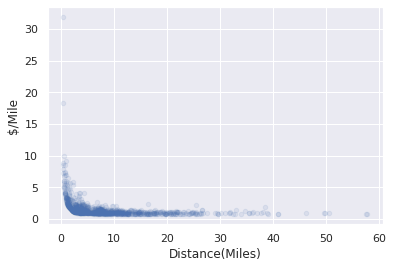

In [ ]:
df.plot.scatter('Distance(Miles)', '$/Mile', alpha=.1);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


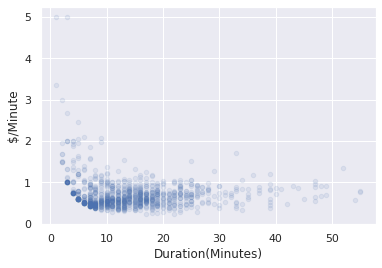

In [ ]:
df.plot.scatter('Duration(Minutes)', '$/Minute', alpha=.1);

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
K = range(1,11)

distortion = []
for k in K:
  kmeans = KMeans(k)

In [ ]:
for k in K:
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(df)
  distortion.append(kmeans.inertia_)
distortion

[785120766.6281774,
 185778357.2294785,
 119176579.86516643,
 88097454.30667466,
 66303985.91541728,
 54845428.59368431,
 47348074.75762335,
 40935611.12363453,
 36280761.62153628,
 31719095.535296753]

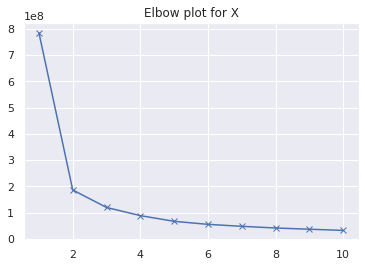

In [ ]:
plt.plot(K, distortion, 'bx-')
plt.title("Elbow plot for X")

plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
labels = kmeans.labels_
print(labels)

[1 1 1 ... 3 3 3]


In [ ]:
new_series = pd.Series(labels)
df['clusters'] = new_series.values

df.head()

,Trip #,Date,Day,Pickup Time,Duration(Minutes),Distance(Miles),Total,$/Minute,$/Mile,clusters
0,1,22,5,1612,8,3.21,3.42,0.427500,1.065421,1
1,2,22,5,1723,15,6.09,6.29,0.419333,1.032841,1
2,3,22,5,1759,33,14.52,13.95,0.422727,0.960744,1
3,4,22,5,1849,8,2.24,3.00,0.375000,1.339286,1
4,5,22,5,1906,18,11.29,14.98,0.832222,1.326838,1


In [ ]:
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

In [ ]:
centroids = get_centroids(df, 'clusters')

In [ ]:
print(centroids)

              Trip #       Date       Day  ...     Total  $/Minute    $/Mile
clusters                                   ...                              
0         250.126812  15.351449  3.097826  ...  9.549275  0.701834  1.463715
1         221.453333  12.300000  2.886667  ...  8.952600  0.672229  1.705803
2         678.429851  35.253731  2.752239  ...  9.907164  0.755854  1.563365
3         766.289753  37.879859  2.773852  ...  9.487350  0.667821  1.644849

[4 rows x 9 columns]


In [ ]:
print (centroids.iloc[0])


Trip #               250.126812
Date                  15.351449
Day                    3.097826
Pickup Time          722.304348
Duration(Minutes)     13.710145
Distance(Miles)        8.855109
Total                  9.549275
$/Minute               0.701834
$/Mile                 1.463715
Name: 0, dtype: float64


In [ ]:
def plot_clusters(df, column_header, centroids):
 colors = {0:'green', 1:'orange', 2:'red', 3:'yellow'}
 fig, ax = plt.subplots()
 grouped = df.groupby(column_header)
 for key, group in grouped:
     group.plot(ax=ax, kind='scatter', x='Duration(Minutes)', y='$/Minute', label=key, color=colors[key])
 ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
 ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
 ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
 ax.plot(centroids.iloc[3].x, centroids.iloc[3].y, "ok")
 ax.set_aspect('equal')
 plt.show()

In [ ]:
def plot_clusters(df, column_header, centroids):
 colors = {0:'red', 1:'green', 2:'yellow', 3:'orange'}
 fig, ax = plt.subplots()
 ax = sns.scatterplot(x='Duration(Minutes)', y='$/Minute', data=centroids)
 ax.set_aspect('equal')
 grouped = df.groupby(column_header)
 for key, group in grouped:
     group.plot(ax=ax, kind='scatter', x='Duration(Minutes)', y='$/Minute', label=key, color=colors[key])
 plt.show()

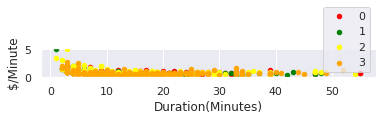

In [ ]:
plot_clusters(df, 'clusters', centroids)

In [ ]:
colors = {0:'green', 1:'orange', 2:'red', 3:'yellow'}


In [ ]:
condition = (df['clusters'] == 0)
condition1= (df['clusters'] == 1)
condition2= (df['clusters'] == 2)
condition3= (df['clusters'] == 3)

In [ ]:
green = df[condition]
orange= df[condition1]
red= df[condition2]
yellow= df[condition3]

Text(0.5, 1.0, 'Run Differential is highly correlated to making the playoffs')

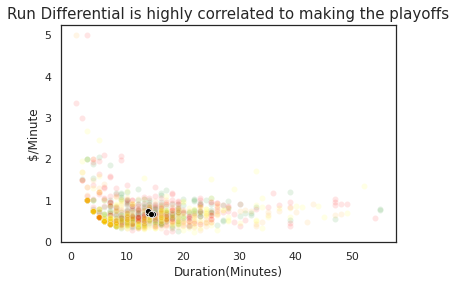

In [ ]:
sns.set_style("white")
ax = sns.scatterplot(x='Duration(Minutes)', y='$/Minute', alpha=.1, data=green, color= 'green')
ax = sns.scatterplot(x='Duration(Minutes)', y='$/Minute', alpha=.1, data=orange, color= 'orange')
ax = sns.scatterplot(x='Duration(Minutes)', y='$/Minute', alpha=.1, data=red, color= 'red')
ax = sns.scatterplot(x='Duration(Minutes)', y='$/Minute', alpha=.1, data=yellow, color= 'yellow')
ax = sns.scatterplot(x='Duration(Minutes)', y='$/Minute', data=centroids, color='black')

plt.xlabel('Duration(Minutes)')
plt.ylabel('$/Minute')
plt.title("Run Differential is highly correlated to making the playoffs", fontsize=15)

Text(0.5, 1.0, 'Run Differential is highly correlated to making the playoffs')

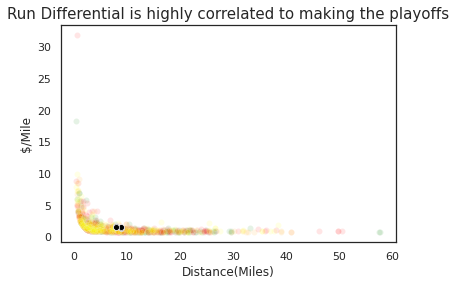

In [ ]:
sns.set_style("white")
ax = sns.scatterplot(x='Distance(Miles)', y='$/Mile', alpha=.1, data=green, color= 'green')
ax = sns.scatterplot(x='Distance(Miles)', y='$/Mile', alpha=.1, data=orange, color= 'orange')
ax = sns.scatterplot(x='Distance(Miles)', y='$/Mile', alpha=.1, data=red, color= 'red')
ax = sns.scatterplot(x='Distance(Miles)', y='$/Mile', alpha=.1, data=yellow, color= 'yellow')
ax = sns.scatterplot(x='Distance(Miles)', y='$/Mile', data=centroids, color='black')

plt.xlabel('Distance(Miles)')
plt.ylabel('$/Mile')
plt.title("Run Differential is highly correlated to making the playoffs", fontsize=15)

Text(0.5, 1.0, 'Run Differential is highly correlated to making the playoffs')

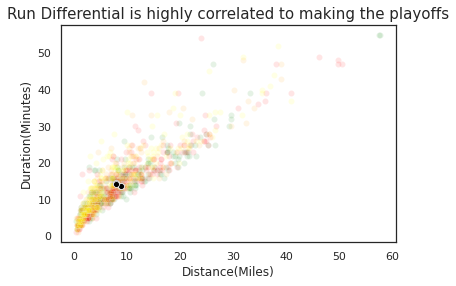

In [ ]:
sns.set_style("white")
ax = sns.scatterplot(x='Distance(Miles)', y='Duration(Minutes)', alpha=.1, data=green, color= 'green')
ax = sns.scatterplot(x='Distance(Miles)', y='Duration(Minutes)', alpha=.1, data=orange, color= 'orange')
ax = sns.scatterplot(x='Distance(Miles)', y='Duration(Minutes)', alpha=.1, data=red, color= 'red')
ax = sns.scatterplot(x='Distance(Miles)', y='Duration(Minutes)', alpha=.1, data=yellow, color= 'yellow')
ax = sns.scatterplot(x='Distance(Miles)', y='Duration(Minutes)', data=centroids, color='black')

plt.xlabel('Distance(Miles)')
plt.ylabel('Duration(Minutes)')
plt.title("Run Differential is highly correlated to making the playoffs", fontsize=15)

KeyError: ignored

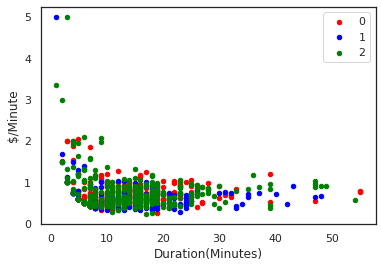

In [ ]:
# Create scatterplot with coloring based on assigned labels
# Trip #	Date	Day	Pickup Time	Duration(Minutes)	Distance(Miles)	Total	$/Minute	$/Mile	clusters
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('clusters')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Duration(Minutes)', y='$/Minute', label=key, color=colors[key])
plt.show()      

In [ ]:
# Drop labels to prove that this is truly unsupervised learning
points = df.drop('clusters', axis=1)
points.head()

,Trip #,Date,Day,Pickup Time,Duration(Minutes),Distance(Miles),Total,$/Minute,$/Mile
0,1,22,5,1612,8,3.21,3.42,0.427500,1.065421
1,2,22,5,1723,15,6.09,6.29,0.419333,1.032841
2,3,22,5,1759,33,14.52,13.95,0.422727,0.960744
3,4,22,5,1849,8,2.24,3.00,0.375000,1.339286
4,5,22,5,1906,18,11.29,14.98,0.832222,1.326838


In [ ]:
import math
import numpy as np
from scipy.spatial import distance

# Calculate the Nearest Centroid to each data point
def find_nearest_centroid(df, centroids, iteration):
 
  # calculate the distances between each point and each centroid
  distances = distance.cdist(df, centroids, 'euclidean')
  
  # Get nearest centroid to each point based on distance
  nearest_centroids = np.argmin(distances, axis=1)

  se = pd.Series(nearest_centroids)
  df['cluster_'+iteration] = se.values
  
  return df

In [ ]:
first_pass = find_nearest_centroid(points.select_dtypes(exclude='int64'), centroids, '1')
first_pass.head()

ValueError: ignored

In [ ]:
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'yellow'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()
  
plot_clusters(first_pass, 'cluster_1', centroids)

NameError: ignored

In [ ]:
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

centroids = get_centroids(first_pass, 'cluster_1')

In [ ]:
# Calculate New Centroids
centroids = get_centroids(first_pass, 'cluster_1')

# Get Clusters for New Centroids
second_pass = find_nearest_centroid(first_pass.select_dtypes(exclude='int64'), centroids, '2')

# Plot New Cluster
plot_clusters(second_pass, 'cluster_2', centroids)

In [ ]:
# Calculate New Centroids
centroids = get_centroids(second_pass, 'cluster_2')

# Get Clusters for New Centroids
third_pass = find_nearest_centroid(second_pass.select_dtypes(exclude='int64'), centroids, '3')

# Plot New Cluster
plot_clusters(third_pass, 'cluster_3', centroids)

In [ ]:
convergence = np.array_equal(second_pass['cluster_2'], third_pass['cluster_3'])

print("Are we at convergence?? - ", convergence)

In [ ]:
# class KMeansCluster:    
#     def __init__(self, k):
#         self.k = k      # number of clusters you want it to identify
#         self.means = None       # mean cluster point values
#     def predict(self, input):
#       eachk = range(self.k)
#       closest = min(eachk, key=lambda i: euclidean(input, self.means[i])**2)
#       return closest
#     def fit(self, inputs):
#         self.means =  random.sample(list(inputs), self.k)
#         clusters = None
#         while True:
#             recluster = map(self.predict, inputs)
#             if clusters == recluster:
#                 return
#             clusters = recluster
#             for i in range(self.k):
#                 coords = [c for c, m in zip(inputs, clusters) if m == i]
#                 if coords:
#                     self.means[i] = np.mean(coords, axis=0)